<a href="https://colab.research.google.com/github/aish793/Sandbox/blob/master/EDA%20and%20Machine%20Learning/Indian_Liver_Patient_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import libraries and dataset**

In [0]:
# pip install matplotlib
# pip install sklearn
# pip install pandas
# pip install seaborn

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
files.upload()

In [0]:
df = pd.read_csv('indian_liver_patient.csv')

## **Descriptive Statistics**

In [0]:
df.describe()

Age  Total_Bilirubin  ...  Albumin_and_Globulin_Ratio     Dataset
count  583.000000       583.000000  ...                  579.000000  583.000000
mean    44.746141         3.298799  ...                    0.947064    1.286449
std     16.189833         6.209522  ...                    0.319592    0.452490
min      4.000000         0.400000  ...                    0.300000    1.000000
25%     33.000000         0.800000  ...                    0.700000    1.000000
50%     45.000000         1.000000  ...                    0.930000    1.000000
75%     58.000000         2.600000  ...                    1.100000    2.000000
max     90.000000        75.000000  ...                    2.800000    2.000000

[8 rows x 10 columns]

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [0]:
df.nunique()

Age                            72
Gender                          2
Total_Bilirubin               113
Direct_Bilirubin               80
Alkaline_Phosphotase          263
Alamine_Aminotransferase      152
Aspartate_Aminotransferase    177
Total_Protiens                 58
Albumin                        40
Albumin_and_Globulin_Ratio     69
Dataset                         2
dtype: int64

Inference:

1. The dataset consists of 583 records and 11 features including target feature 'Dataset' that has two unique values: 1- Liver disease, 2- No liver disease
2. Gender is the only non-numeric feature.
3. Albumin_and_Globulin_Ratio has 4 missing values

## **Pie charts and boxplots**


In [0]:
fig = plt.figure(figsize = (18, 6))
(ax1, ax2) = fig.subplots(1,2)
d1 = df["Dataset"].value_counts().to_dict()
d2 = df["Gender"].value_counts().to_dict()

ax1.pie(d1.values(),
       labels = d1.keys(), 
       autopct = '%1.1f%%', 
       textprops = {'fontsize': 14, 'color' : "white"})

ax1.set_title("Pie chart: Liver patients and non-liver patients proportion")
ax1.legend(loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 14, title = "Dataset")

ax2.pie(d2.values(),
       labels = d2.keys(),
       autopct = '%1.1f%%',
       textprops = {'fontsize': 14, 'color' : "white"})
ax2.set_title("Pie chart: Male and Female proportions")
ax2.legend(loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 14, title = "Gender")

plt.tight_layout()

In [0]:
ax3 = sns.countplot(x="Gender", hue="Dataset", data=df)
ax3.set_title("Frequency of Gender by Dataset", fontsize = 14)

Text(0.5, 1.0, 'Frequency of Gender by Dataset')


**Observations:** 


1.   71 % individuals have liver disease
2.   Males are more likely to get liver disease



Text(0.5, 1.0, 'Boxplot of Age v/s Gender by Dataset')

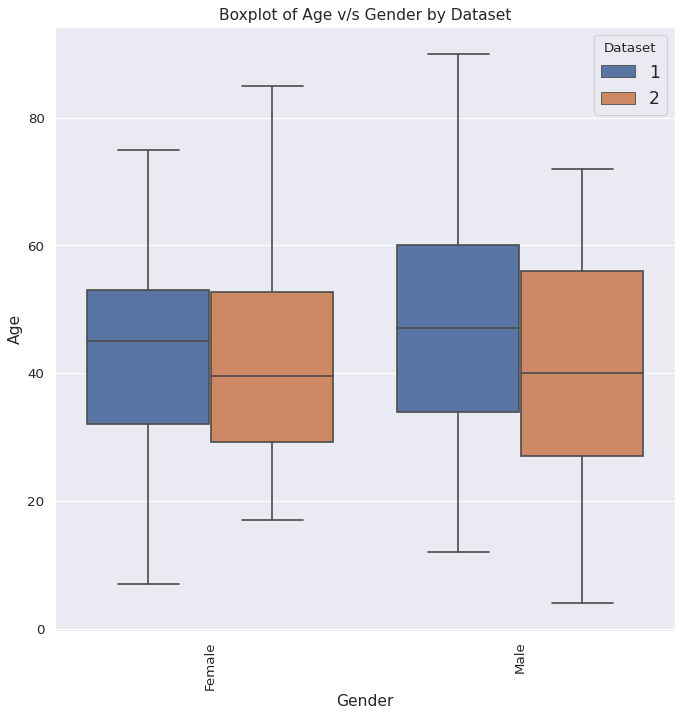

In [0]:
plt.figure(figsize = (10, 10), dpi = 80)
ax = sns.boxplot(x = "Gender", y = "Age", data = df, hue = "Dataset")
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_xlabel("Gender", fontsize = 14)
ax.set_ylabel("Age", fontsize = 14)
ax.set_title("Boxplot of Age v/s Gender by Dataset", fontsize = 14)

**Observations:** 

1.   Females likely to get disease between ~ 35 & 55
2.   Males likely to get disease between ~ 37 & 60

## **Heatmap of correlation matrix**

Text(0.5, 1.0, 'Heatmap for correlation matrix')

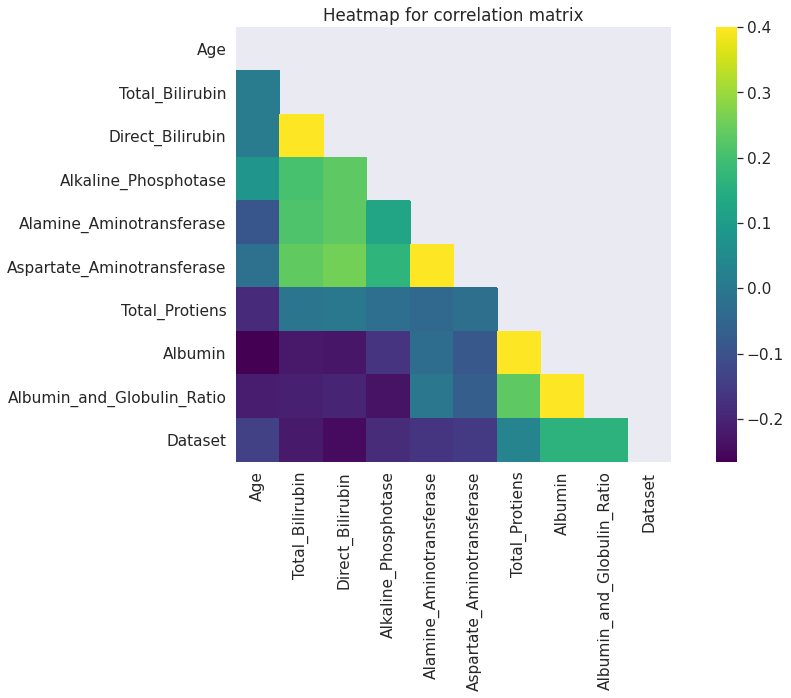

In [0]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(16,8))
ax = sns.heatmap(corr, mask=mask, vmax=0.4, square = True,  cmap = "viridis")
ax.set_title('Heatmap for correlation matrix')

In [0]:
corr

Age  ...   Dataset
Age                         1.000000  ... -0.137351
Total_Bilirubin             0.011763  ... -0.220208
Direct_Bilirubin            0.007529  ... -0.246046
Alkaline_Phosphotase        0.080425  ... -0.184866
Alamine_Aminotransferase   -0.086883  ... -0.163416
Aspartate_Aminotransferase -0.019910  ... -0.151934
Total_Protiens             -0.187461  ...  0.035008
Albumin                    -0.265924  ...  0.161388
Albumin_and_Globulin_Ratio -0.216408  ...  0.163131
Dataset                    -0.137351  ...  1.000000

[10 rows x 10 columns]

**Observation:** (r = Correlation value)

*Correlated features*


1.   **Cluster I** : r ~>0.7
    1.   Direct_bilirubin Vs Total_bilirubin : Only one can be taken into consideration
    2.   Aspartate_Aminotransferase Vs Alamine_Aminotransferase
    3.   Total_Protiens Vs Albumin
    4.   Albumin Vs Albumin_and_Globulin_Ratio

2.   **Cluster II :** |r| > 0.2
    1.   [Alkaline_phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase] Vs Direct_bilirubin  : 
    2.   Albumin_and_Globulin_Ratio Vs [Total_Protiens, Alkaline_phosphotase] :
    3.   Albumin Vs [Age, Direct_bilirubin] :   

3.   **Cluster III :** With Respect to *Dataset*
    1.   Dataset Vs *[all columns]* :


### Cluster I

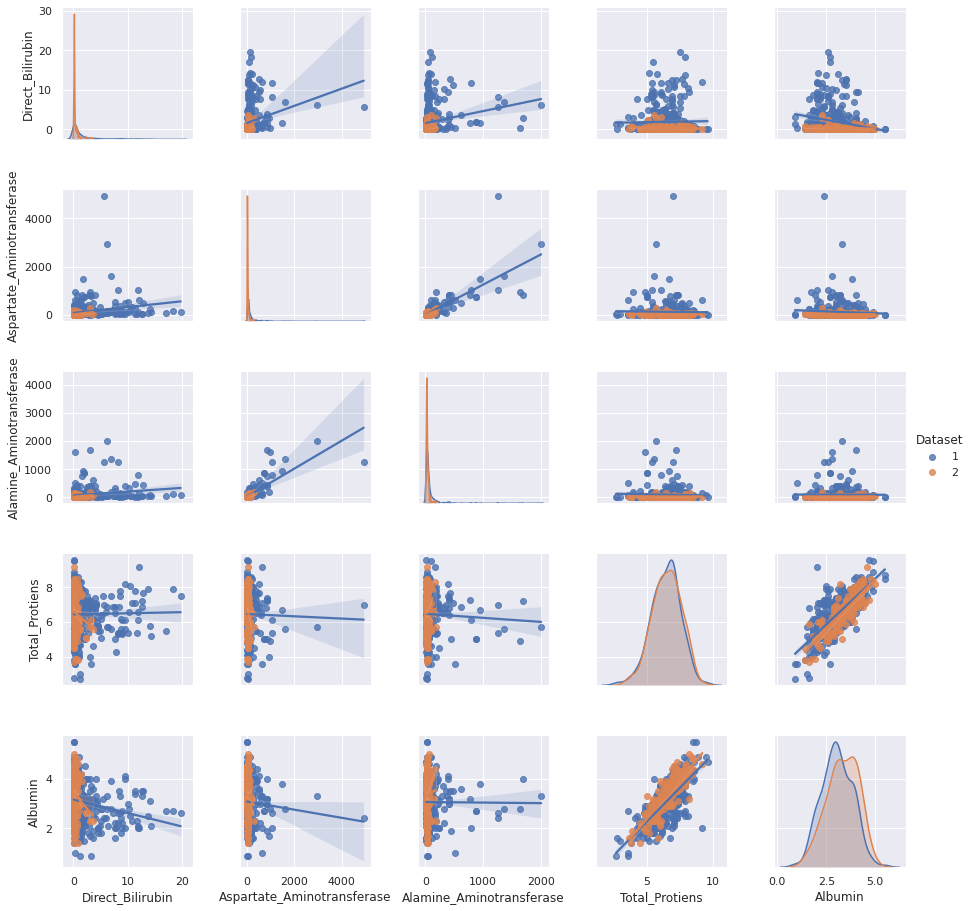

In [0]:
sns.set(font_scale=1)
sns.pairplot(df[[ 'Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Alamine_Aminotransferase',
                  'Total_Protiens', 'Albumin', 'Dataset']], 
             kind = "reg", 
             hue = "Dataset")

**Observations**


1.   Albumin and Total_protiens highly correlated
2.   Albumin and Direct_Bilirubin are slightly negatively correlated
3.   Aspartate_Aminotransferase and Alamine_Aminotransferase are positively correlated



### Cluster II

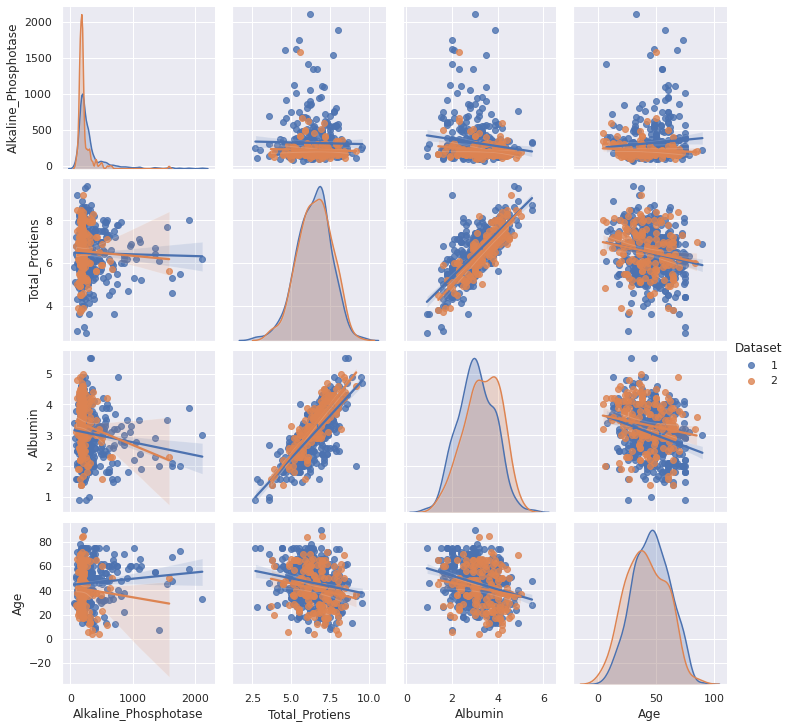

In [0]:
sns.set(font_scale=1)
sns.pairplot(df[[  'Alkaline_Phosphotase','Total_Protiens','Albumin', 'Age' ,'Dataset']], 
             kind = "reg", 
             hue = "Dataset"
            )

**Observations**

1. Age and [Albumin, Total_Protiens] are slightly negatively correlated.
2. Age and Alkaline_Phosphotase are slightly negatively correlated in case of non-liver disease patients. 
3. Age and Alkaline_Phosphotase are slightly positively correlated in case of liver disease patients.
4. Alkaline_Phosphotase and Albumin are slightly negatively correalted.

In [0]:
fig = plt.figure(figsize = (10, 7))
ax1= fig.subplots(1,1)
x = df["Dataset"]
y1 = df["Alkaline_Phosphotase"]
ax1 = sns.stripplot(x, y1)
ax1.set_title("Jitter plot: Dataset v/s Alkaline_Phosphotase")

Text(0.5, 1.0, 'Jitter plot: Dataset v/s Alkaline_Phosphotase')

Jitter plot: Dataset v/s Alkaline_Phosphotase: 
1. Liver patients have high ranges of Alkaline_Phosphotase

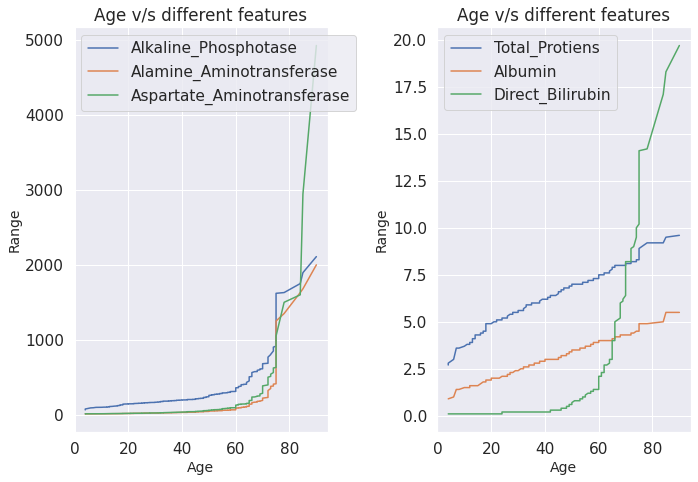

In [0]:
fig = plt.figure(figsize = (10, 7))
(ax1, ax2) = fig.subplots(1,2)
x = df["Age"].sort_values()
y1 = df["Alkaline_Phosphotase"].sort_values()
y2 = df["Alamine_Aminotransferase"].sort_values()
y3 = df["Aspartate_Aminotransferase"].sort_values()
y4 = df["Total_Protiens"].sort_values()
y5 = df["Albumin"].sort_values()
y6 = df["Direct_Bilirubin"].sort_values()
ax1.plot(x,y1, label = 'Alkaline_Phosphotase')
ax1.plot(x,y2, label = 'Alamine_Aminotransferase')
ax1.plot(x,y3, label = 'Aspartate_Aminotransferase')
ax2.plot(x,y4, label = 'Total_Protiens')
ax2.plot(x,y5, label = 'Albumin')
ax2.plot(x,y6, label = 'Direct_Bilirubin')
ax1.set_title("Age v/s different features")
ax2.set_title("Age v/s different features")
ax1.set_xlabel("Age", fontsize = 14)
ax1.set_ylabel("Range", fontsize = 14)
ax2.set_xlabel("Age", fontsize = 14)
ax2.set_ylabel("Range", fontsize = 14)
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")
plt.tight_layout()

# **Classification**

### Import packages and split dataset

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

Convert 'Gender' to numeric:


In [0]:
df_1 = pd.get_dummies(df, columns=["Gender"], drop_first=False)

Replace missing values in 'Albumin_and_Globulin_Ratio' with column mean:

In [0]:
Albumin_and_Globulin_Ratio_array = df_1[df_1["Albumin_and_Globulin_Ratio"]!=np.nan]["Albumin_and_Globulin_Ratio"]
df_1["Albumin_and_Globulin_Ratio"] = df_1["Albumin_and_Globulin_Ratio"].replace(np.nan,Albumin_and_Globulin_Ratio_array.mean())

Separate features and labels:


In [0]:
X = df_1.drop(['Dataset'], axis=1)
Y = df_1['Dataset']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

## Prediction Algorithms

 Naive Bayes

Accuracy for Gaussian model: 
 0.5714285714285714
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      0.39      0.56       122
           2       0.41      1.00      0.59        53

    accuracy                           0.57       175
   macro avg       0.71      0.69      0.57       175
weighted avg       0.82      0.57      0.57       175



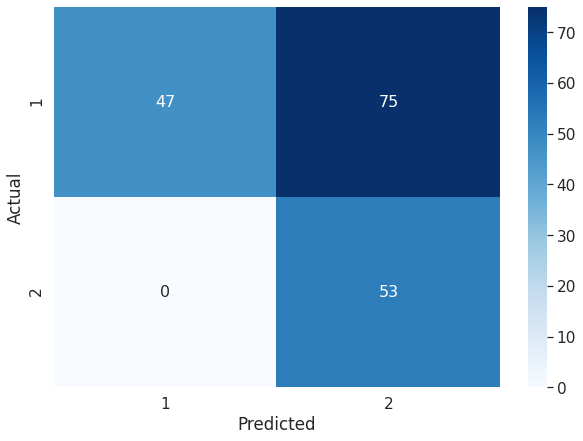

In [0]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, Y_train)
nb_predicted = gaussian_model.predict(X_test)
print('Accuracy for Gaussian model: \n', accuracy_score(Y_test, nb_predicted))
print('Classification Report: \n', classification_report(Y_test,nb_predicted))
cm = confusion_matrix(Y_test, nb_predicted)
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})


Logistic Regression

Accuracy for Logistic Regression: 
 0.6914285714285714
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.93      0.81       122
           2       0.47      0.15      0.23        53

    accuracy                           0.69       175
   macro avg       0.59      0.54      0.52       175
weighted avg       0.64      0.69      0.63       175



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


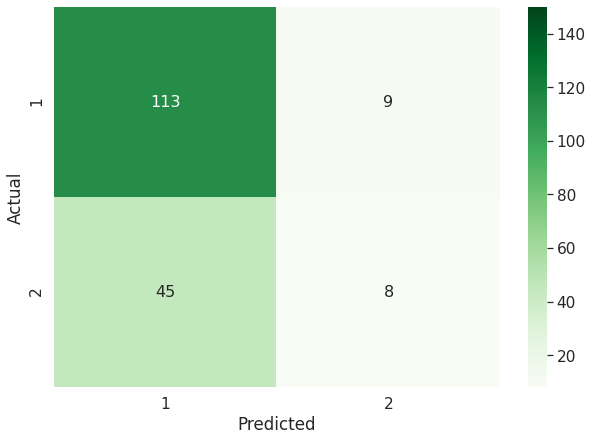

In [0]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
lr_predicted= log_reg.predict(X_test)
print('Accuracy for Logistic Regression: \n', accuracy_score(Y_test,lr_predicted))
print('Classification Report: \n', classification_report(Y_test,lr_predicted))
cm = confusion_matrix(Y_test, lr_predicted)
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm,vmax=150, cmap="Greens",fmt ='d', annot=True, annot_kws={"size": 16})

Decision Tree

In [0]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, Y_train)
dt_predicted = dt_model.predict(X_test)
print('Accuracy of Decision Tree: \n', accuracy_score(Y_test,dt_predicted))
print('Classification Report: \n', classification_report(Y_test,dt_predicted))
cm = confusion_matrix(Y_test, dt_predicted)
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16})

Accuracy of Decision Tree: 
 0.64
Classification Report: 
               precision    recall  f1-score   support

           1       0.73      0.77      0.75       122
           2       0.39      0.34      0.36        53

    accuracy                           0.64       175
   macro avg       0.56      0.56      0.56       175
weighted avg       0.63      0.64      0.63       175



Decision tree image


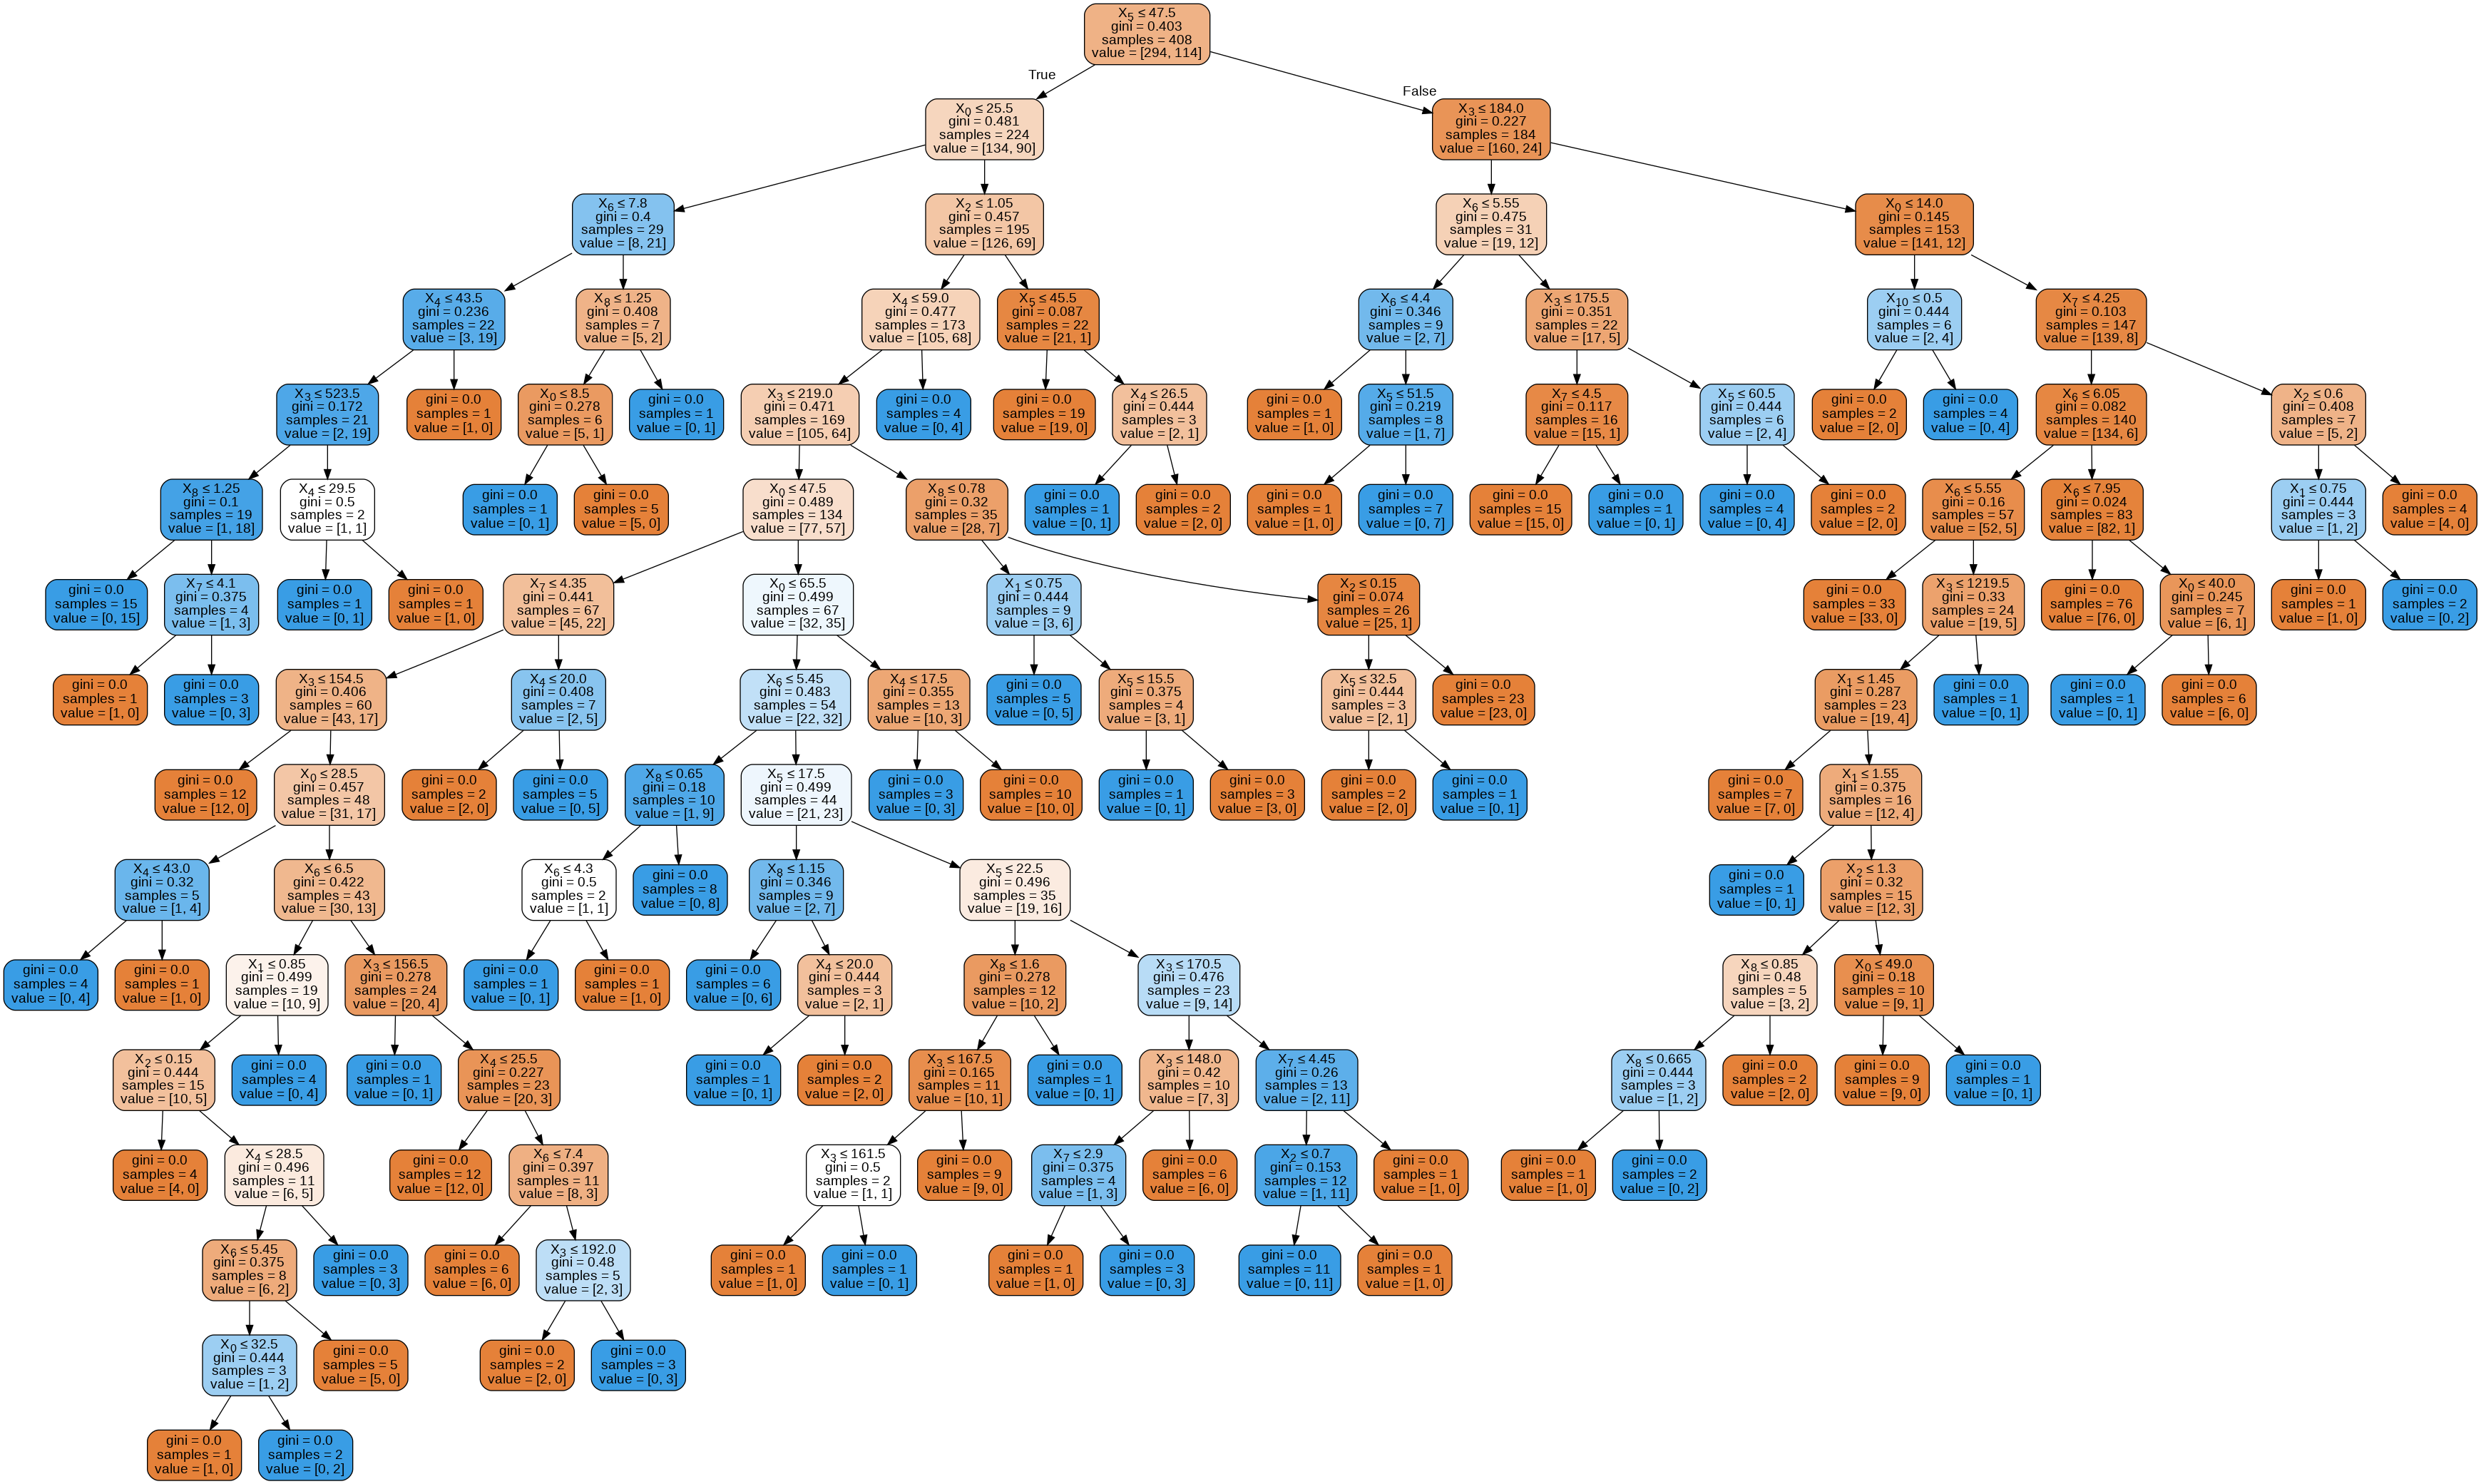

In [0]:
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Neural Network

In [0]:
mlp_model = MLPClassifier(solver='sgd', activation='relu',
              hidden_layer_sizes=(5, 2), shuffle=True, batch_size='auto', random_state=1)
mlp_model.fit(X_train, Y_train)
mlp_pred = mlp_model.predict(X_test)
print('Accuracy of MLP: \n', accuracy_score(Y_test,mlp_pred))
print('Classification Report: \n', classification_report(Y_test,mlp_pred))
cm = confusion_matrix(Y_test, mlp_pred)
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="BrBG",fmt = 'd', annot=True,annot_kws={"size": 16})

Accuracy of MLP: 
 0.6971428571428572
Classification Report: 
               precision    recall  f1-score   support

           1       0.70      1.00      0.82       122
           2       0.00      0.00      0.00        53

    accuracy                           0.70       175
   macro avg       0.35      0.50      0.41       175
weighted avg       0.49      0.70      0.57       175



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Remove Correlated columns to increase accuracy

In [0]:
df_2 = df_1[['Age', 'Direct_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Protiens', 'Albumin', 'Dataset',
       'Gender_Female', 'Gender_Male']]
X2 = df_2.drop(['Dataset'], axis=1)
Y2 = df_2['Dataset']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.30, random_state=0)

In [0]:
mlp_model = MLPClassifier( activation='relu',
              hidden_layer_sizes=(5, 2), shuffle=True, batch_size='auto', random_state=1)
mlp_model.fit(X_train2, Y_train2)
mlp_pred = mlp_model.predict(X_test2)
print('Accuracy: \n', accuracy_score(Y_test2,mlp_pred))

Accuracy: 
 0.6971428571428572


In [0]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train2, Y_train2)
nb_predicted = gaussian_model.predict(X_test2)
print('Accuracy: \n', accuracy_score(Y_test2, nb_predicted))

Accuracy: 
 0.5542857142857143


### Conclusion : Model performance did not increase much (PCA could be tried)
Probable Reason:

1.   Less Data
2.   Class Imbalance problem

